# Herron - Web Data, Log and Simple Returns, and Portfolio Math

This notebook covers three topics:

1. How to use the yfinance, pandas-datareader, and requests-cache packages to download data from [Yahoo! Finance](https://finance.yahoo.com/), the [Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html), and the [Federal Reserve Economic Database (FRED)](https://fred.stlouisfed.org/)
1. How to calculate log and simple returns
1. How to calculate portfolio returns

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

## Web Data

We will typically use the yfinance and pandas-datarader packages (combined with the requests-cache package) to download data from the web.

- If you followed my instructions to install Anaconda on your computer, you already installed these packages
- If you use DataCamp Workspace or Binder, I already installed these packages
- If you use Notheastern's Open OnDemand, they are still working on my request and you will have to install these packages every login by running the following in an code cell: `%pip install yfinance pandas-datareader requests-cache`

### The yfinance Package

The [yfinance package](https://github.com/ranaroussi/yfinance) provides "a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance."
Other packages provide similar functionality, but I think yfinance is best.
We will use the [requests-cache package](https://github.com/requests-cache/requests-cache) to locally cache our data downloads.
This local cache lets reduce the number of times we ask the Yahoo! Finance application programming interface (API).

In [18]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after=1)

We can download data for the MATANA stocks (Microsoft, Alphabet, Tesla, Amazon, Nvidia, and Apple).
We can pass tickers as either a space-delimited string or a list of strings.

In [14]:
tickers_1 = yf.Tickers(tickers='MSFT GOOG TSLA AMZN NVDA AAPL', session=session)
prices_1 = tickers_1.history(period='max', auto_adjust=False, progress=False)
prices_1.index = prices_1.index.tz_localize(None)
prices_1

Adj Close                                                 Close  \
                AAPL     AMZN     GOOG     MSFT     NVDA     TSLA     AAPL   
Date                                                                         
1980-12-12    0.0999      NaN      NaN      NaN      NaN      NaN   0.1283   
1980-12-15    0.0947      NaN      NaN      NaN      NaN      NaN   0.1217   
1980-12-16    0.0877      NaN      NaN      NaN      NaN      NaN   0.1127   
1980-12-17    0.0899      NaN      NaN      NaN      NaN      NaN   0.1155   
1980-12-18    0.0925      NaN      NaN      NaN      NaN      NaN   0.1189   
...              ...      ...      ...      ...      ...      ...      ...   
2023-01-25  141.8600  97.1800  96.7300 240.6100 193.2300 144.4300 141.8600   
2023-01-26  143.9600  99.2200  99.1600 248.0000 198.0200 160.2700 143.9600   
2023-01-27  145.9300 102.2400 100.7100 248.1600 203.6500 177.9000 145.9300   
2023-01-30  143.0000 100.5500  97.9500 242.7100 191.6200 166.6600 143.0000   
2023-02-01  143.1800 102.2150 100.0100 247.4300 198.4900 171.7900 143.1800   

                                       ... Stock Splits                       \
               AMZN     GOOG     MSFT  ...         GOOG   MSFT   NVDA   TSLA   
Date                                   ...                                     
1980-12-12      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-15      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-16      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-17      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-18      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
...             ...      ...      ...  ...          ...    ...    ...    ...   
2023-01-25  97.1800  96.7300 240.6100  ...       0.0000 0.0000 0.0000 0.0000   
2023-01-26  99.2200  99.1600 248.0000  ...       0.0000 0.0000 0.0000 0.0000   
2023-01-27 102.2400 100.7100 248.1600  ...       0.0000 0.0000 0.0000 0.0000   
2023-01-30 100.5500  97.9500 242.7100  ...       0.0000 0.0000 0.0000 0.0000   
2023-02-01 102.2150 100.0100 247.4300  ...       0.0000 0.0000 0.0000 0.0000   

               Volume                                                          \
                 AAPL          AMZN          GOOG          MSFT          NVDA   
Date                                                                            
1980-12-12  469033600           NaN           NaN           NaN           NaN   
1980-12-15  175884800           NaN           NaN           NaN           NaN   
1980-12-16  105728000           NaN           NaN           NaN           NaN   
1980-12-17   86441600           NaN           NaN           NaN           NaN   
1980-12-18   73449600           NaN           NaN           NaN           NaN   
...               ...           ...           ...           ...           ...   
2023-01-25   65799300 94261600.0000 31000900.0000 66526600.0000 44953700.0000   
2023-01-26   54105100 68523600.0000 24542100.0000 33454500.0000 48953500.0000   
2023-01-27   70492800 87678100.0000 29011900.0000 26480800.0000 54163300.0000   
2023-01-30   64015300 70691900.0000 24365100.0000 25867400.0000 48861100.0000   
2023-02-01    2095637  2789188.0000   816050.0000   721881.0000  1701085.0000   

                           
                     TSLA  
Date                       
1980-12-12            NaN  
1980-12-15            NaN  
1980-12-16            NaN  
1980-12-17            NaN  
1980-12-18            NaN  
...                   ...  
2023-01-25 192734300.0000  
2023-01-26 234815100.0000  
2023-01-27 305632100.0000  
2023-01-30 230878800.0000  
2023-02-01  11367725.0000  

[10623 rows x 48 columns]

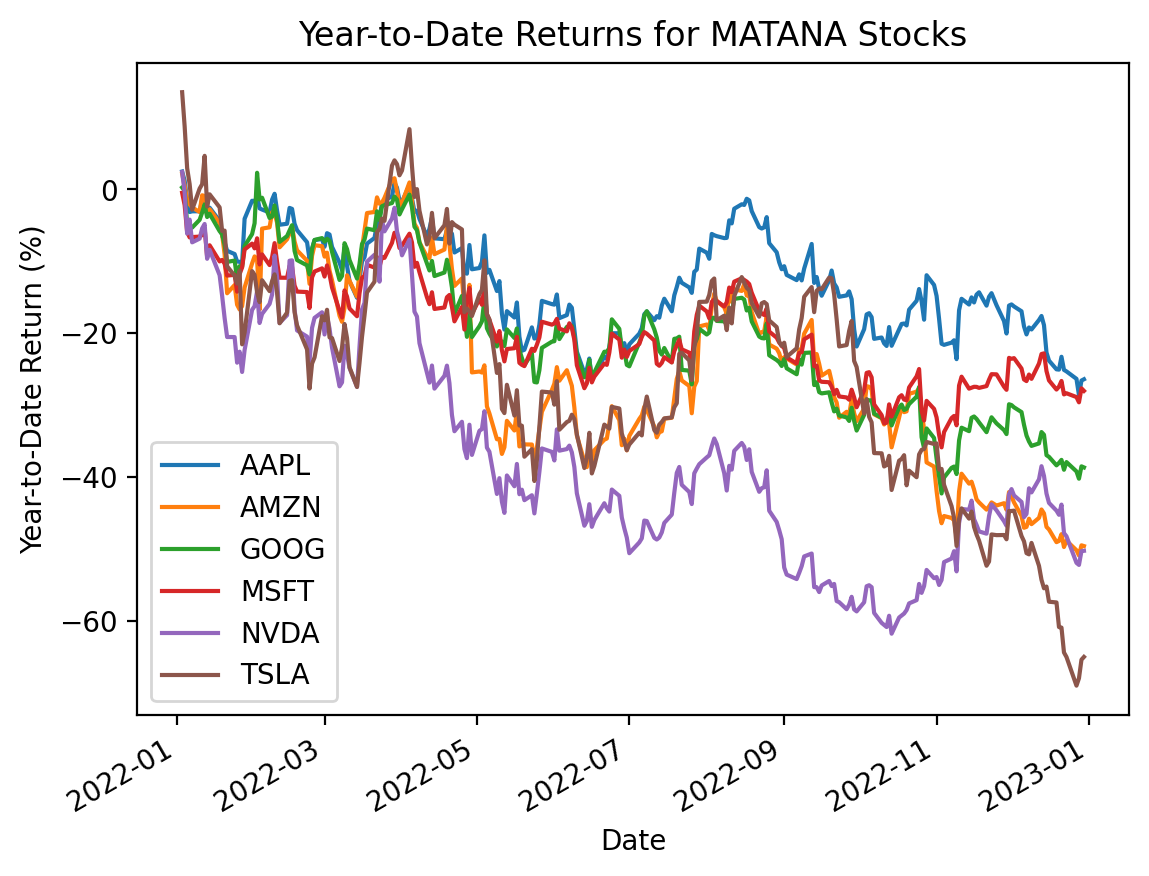

In [15]:
( # Python ignores line breaks and white space inside ()
    prices_1 # start with MATANA data frame
    ['Adj Close'] # slice adjusted close columns
    .pct_change() # calculate simple returns
    .loc['2022'] # select 2022 returns
    .add(1) # add 1
    .cumprod() # compound cumulative returns
    .sub(1) # subtract 1
    .mul(100) # convert decimals to percent
    .plot() # plot
)
plt.ylabel('Year-to-Date Return (%)')
plt.title('Year-to-Date Returns for MATANA Stocks')
plt.show()

### The pandas-datareader package

The [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package provides easy access to a variety of data sources, including
    [the Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 
    and 
    [the Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/).
The pandas-datareader package also provides access to Yahoo! Finance data, but the yfinance package has better documentation.
The pandas-datareader packages should already be installed in your DataCamp Workspace environment.
If not, we can install these packages with the `%pip` magic in the following cell, which we only need to run once.
If you use a local installation of the Anaconda distribution, you can instead run `! conda install -y -c conda-forge pandas-datareader`.

We will use `pdr` as the abbreviated prefix for pandas-datareader.

In [16]:
import pandas_datareader as pdr

He is an example with the daily benchmark factors from Ken French's Data Library.
The `get_available_datasets()` function provides the exact names for all of Ken French's data sets.

In [20]:
pdr.famafrench.get_available_datasets(session=session)[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

For Fama and French data, returns the most recent five years of data unless we specify a `start` date.
Most of French's data are available back through the second half of 1926.
Also, pandas-datareader returns dictionaries of data frames
The value for the `'DESCR'` key describes the returned data frames.

In [21]:
ff = pdr.get_data_famafrench(
    'F-F_Research_Data_Factors_daily', 
    start='1900', 
    session=session
)

In [22]:
print(ff['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202212 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2022 Kenneth R. French

  0 : (25399 rows x 4 cols)


In [23]:
ff[0]

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.1000,-0.2500,-0.2700,0.0090
1926-07-02,0.4500,-0.3300,-0.0600,0.0090
1926-07-06,0.1700,0.3000,-0.3900,0.0090
1926-07-07,0.0900,-0.5800,0.0200,0.0090
1926-07-08,0.2100,-0.3800,0.1900,0.0090
...,...,...,...,...
2022-12-23,0.5100,-0.6000,1.1500,0.0160
2022-12-27,-0.5100,-0.7300,1.4200,0.0160
2022-12-28,-1.2300,-0.2500,-0.2900,0.0160


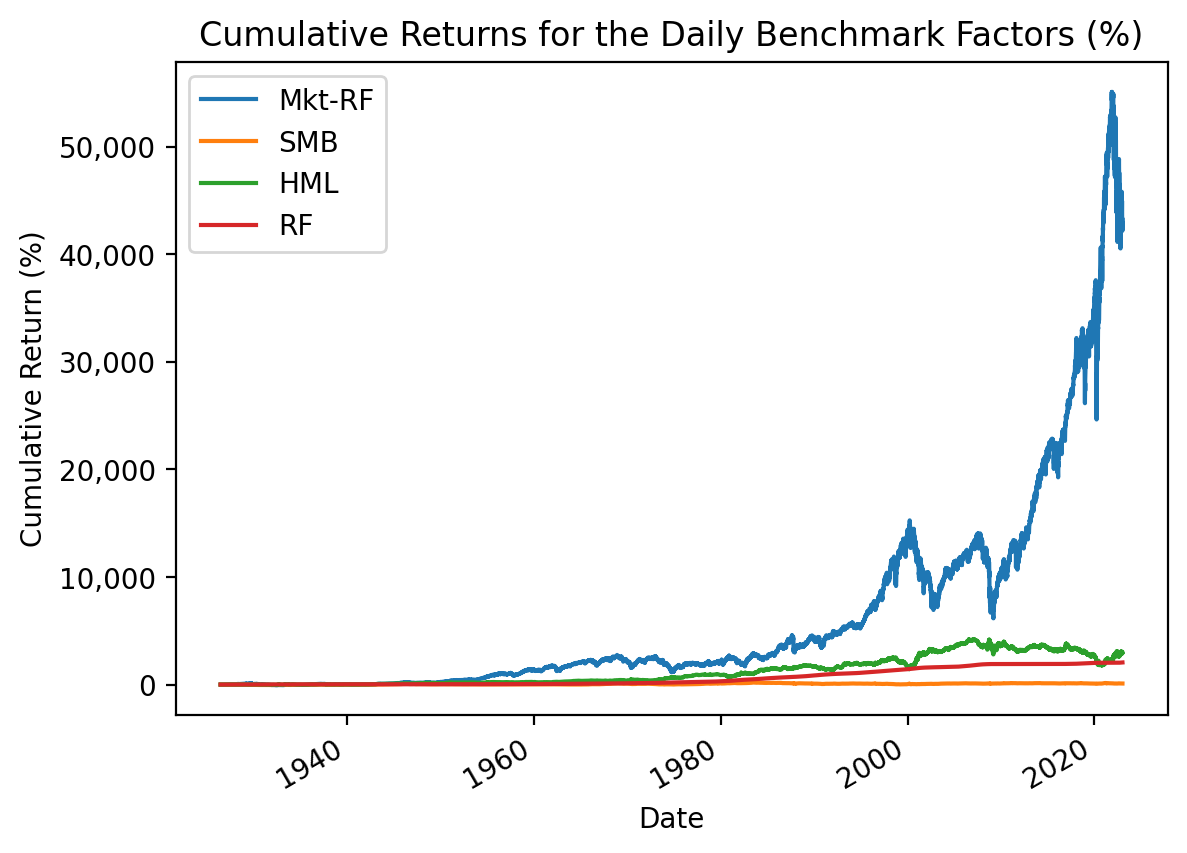

In [31]:
(
    ff[0]
    .div(100)
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns for the Daily Benchmark Factors (%)')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Log and Simple Returns

We will typically calculate *simple* returns as in finance 101: $R_{simple,t} = \frac{P_t + D_t - P_{t-1}}{P_{t-1}} = \frac{P_t + D_t}{P_{t-1}} - 1.$
The simple return is the return that investors receive on invested dollars.
We can calculate simple returns from Yahoo Finance data with the `.pct_change()` method on the adjusted close column (i.e., `Adj Close`).
The adjusted close column is a reverse-engineered close price (i.e., end-of-trading-day price) that incorporates dividends and splits, making simple return calculations easy.

However, we may see *log* returns elsewhere, which are the (natural) log of one plus simple returns:
\begin{align*}
    R_{log,t} &= \log(1 + R_{simple,t}) \\
    &= \log\left(1 + \frac{P_t - P_{t-1} + D_t}{P_{t-1}} \right) \\
    &= \log\left(1 +  \frac{P_t + D_t}{P_{t-1}} - 1 \right) \\
    &= \log\left(\frac{P_t + D_t}{P_{t-1}} \right) \\
    &= \log(P_t + D_t) - \log(P_{t-1})
\end{align*}
Therefore, we calculate log returns as either the log of one plus simple returns or the difference of the logs of the adjusted close column.
Log returns are also known as *continuously-compounded* returns.

We will typically use *simple* returns instead of *log* returns.
However, thise section explains the differences between simple and log returns and when each is appropriate.

### Simple and Log Returns are Similar for Small Returns

$\log(1 + x) \approx x$ for small values of $x$, so simple returns and log returns are similar for small returns.
Returns are typically small at daily and monthly horizon, so the difference between simple and log returns is small at daily and monthly horizons.
The following figure shows that $R_{simple,t} \approx R_{log,t}$ for small $R$s.

In [32]:
R = np.linspace(-0.75, 0.75, 100)
logR = np.log(1 + R)

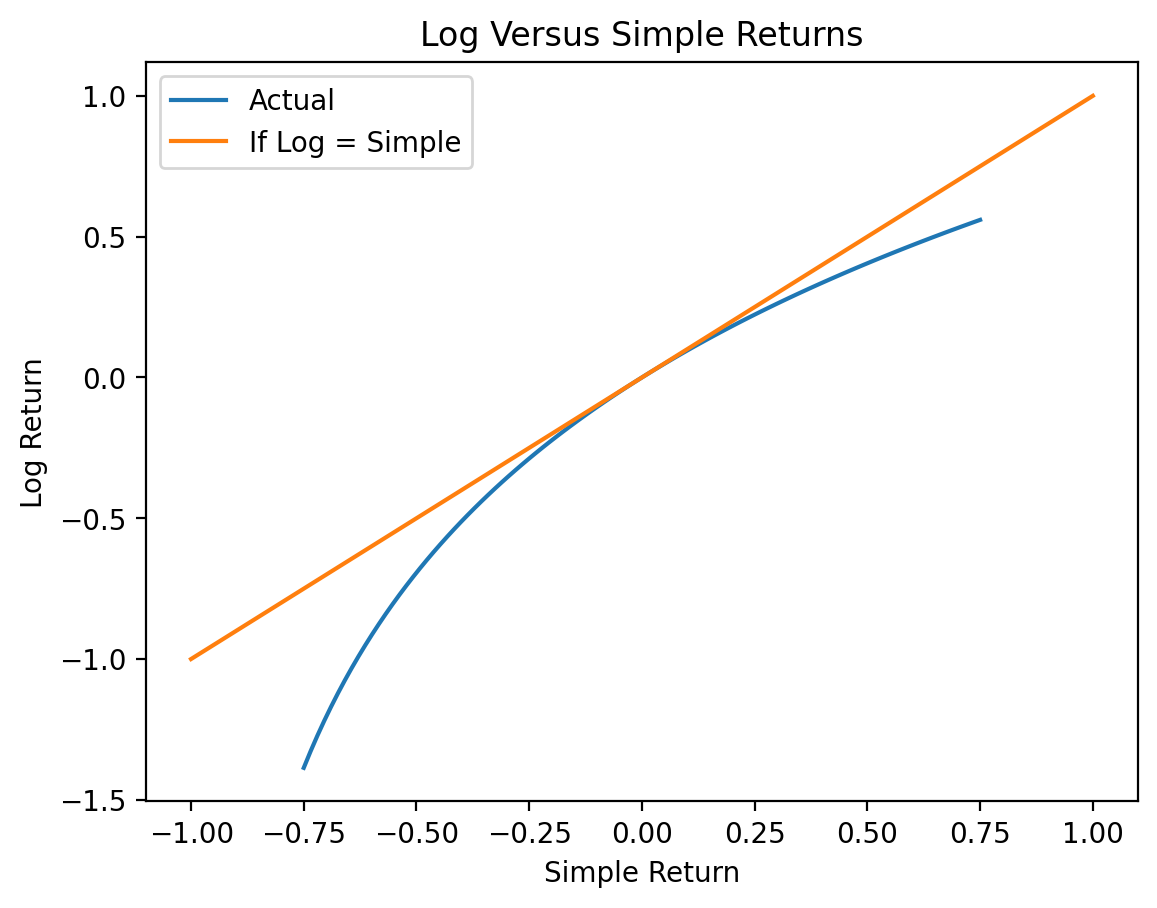

In [33]:
plt.plot(R, logR)
plt.plot([-1, 1], [-1, 1])
plt.xlabel('Simple Return')
plt.ylabel('Log Return')
plt.title('Log Versus Simple Returns')
plt.legend(['Actual', 'If Log = Simple'])
plt.show()

### Simple Return Advantage: Portfolio Calculations

We can only perform portfolio calculations with simple returns.
For a portfolio of $N$ assets with portfolio weights $w_i$, the portfolio return $R_{p}$ is the weighted average of the returns of its assets, $R_{p} = \sum_{i=1}^N w_i \cdot R_{i}$.
For two stocks with portfolio weights of 50%, our portolio return is $R_{portfolio} = 0.5 \cdot R_1 + 0.5 \cdot R_2 = \frac{R_1 + R_2}{2}$.
However, we cannot calculate portfolio returns with log returns because the sum of logs is the log of products.

***We cannot calculate portfolio returns as the weighted average of log returns.***

### Log Return Advantage: Log Returns are Additive

The advantage of log returns is that we can compound log returns with addition.
The additive property of log returns makes code simple, computations fast, and proofs easy when we have to compound returns over multiple periods.

We compound returns from $t=0$ to $t=T$ as, $1 + R_{0, T} = (1 + R_1) \times (1 + R_2) \times \cdots \times (1 + R_T)$.
With log returns instead of simple returns, this calculation becomes additive instead of multiplicative.

First, take the log of both sides of the previous equation, then use the idea that the log of products is the sum of logs.
\begin{align*}
    \log(1 + R_{0, T}) &= \log((1 + R_1) \times (1 + R_2) \times \cdots \times (1 + R_T)) \\
    &= \log(1 + R_1) + \log(1 + R_2) + \cdots + \log(1 + R_T) \\
    &= \sum_{t=1}^T \log(1 + R_t) \\
\end{align*}

Second, exponentiate both sides of the previous equation.
\begin{align*}
    e^{\log(1 + R_{0, T})} &= e^{\sum_{t=0}^T \log(1 + R_t)} \\
    1 + R_{0,T} &= e^{\sum_{t=0}^T \log(1 + R_t)} \\
    R_{0 ,T} &= e^{\sum_{t=0}^T \log(1 + R_t)} - 1
\end{align*}
So, the return $R_{0,T}$ from $t=0$ to $t=T$ is the exponentiated sum of log returns.
This calculation is heavily optimized in pandas.

The following code generates 10,000 random log returns.
The `np.random.randn()` call generates normally distributed random numbers.
To generate equivalent simple returns, we exponentiate these log returns, then subtract one.

In [34]:
np.random.seed(42)
df = pd.DataFrame(data={'R': np.exp(np.random.randn(10000)) - 1})

We can time the calculation of 12-observation rolling returns.
We use `.apply()` for the simple return version because `.rolling()` does not have a product method.
We find that `.rolling()` is slower with `.apply()` than with `.sum()` by a factor of 2,000.

In [39]:
%%timeit
df['R12_via_simple'] = (
    df['R']
    .add(1)
    .rolling(12)
    .apply(lambda x: x.prod())
    .sub(1)
)

340 ms ± 8.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit
df['R12_via_log'] = (
    df['R']
    .add(1)
    .pipe(np.log)
    .rolling(12)
    .sum()
    .pipe(np.exp)
    .sub(1)
)

426 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
np.allclose(df['R12_via_simple'], df['R12_via_log'], equal_nan=True)

True

These two approaches calculate the same return, but the simple-return approach is 1,000 times slower than the log-return approach!

## Portfolio Math

The return on a portfolio $R_{p}$ is the weighted average of the returns on its assets, $R_{p} = \sum_{i=1}^N w_i \cdot R_{i}$.
If we combine these $N$ asset returns into a matrix $\bf{R}$ and these $N$ asset weights into a vector $w$, we can use linear algebra to calculate portfolio return $R_p = w^T \bf{R}$.
We can apply these ideas to quickly calculate portfolio returns with Python and pandas.

### The 1/N Portfolio

The $\frac{1}{N}$ portfolio assigns equal weights to portfolio assets, so $w_1 = w_2 = \ldots = w_N = \frac{1}{N}$, and rebalances assets every returns period.
The return on a $\frac{1}{N}$ portfolio is easy to calculate with the `.mean()` method!

In [35]:
returns = df_1.loc['2021', 'Adj Close'].pct_change()

In [36]:
p_1 = returns.mean(axis=1)

***Note that when we apply the same portfolio weights every day, we rebalance at the same frequency as the returns data.***
If we have daily data, rebalance daily.
If we have monthly data, we rebalance monthly, and so on.

In [ ]:
returns.shape

In [37]:
weights = np.ones(returns.shape[1]) / returns.shape[1]

In [38]:
weights

array([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

The pandas notation to calculate $w^T \bf{R}$ is `R.dot(w)`.
This notation becomes `returns.dot(weights)` using our variable names above.

In [39]:
p_2 = returns.dot(weights)

In [42]:
np.allclose(p_1, p_2, equal_nan=True)

False